<a href="https://colab.research.google.com/github/dookda/cmu_water_balance/blob/main/testRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
model = Sequential()

model.add(Dense(1, activation='relu', input_shape=(1,)))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# model.get_config()
print(model.layers[0].get_weights())

[array([[0.42684162]], dtype=float32), array([0.], dtype=float32)]


In [10]:
from tensorflow.keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(1, input_shape=(1,1)))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# model.get_config()
print(model.layers[0].get_weights())

[array([[-0.26399937, -0.5597716 , -0.2139706 ],
       [-0.01154774,  0.2700975 , -0.5609945 ],
       [ 0.575668  , -0.56438446, -0.5706838 ],
       [-0.3848394 , -0.5366659 , -0.18173721],
       [ 0.3530184 , -0.42437404,  0.31708115],
       [ 0.5562775 ,  0.5520568 , -0.18359894],
       [ 0.41018677,  0.00930035,  0.29911345],
       [ 0.08485013, -0.36129558, -0.31942865],
       [ 0.60409856,  0.60081315, -0.27098513],
       [ 0.36298692, -0.57480943, -0.00559634]], dtype=float32), array([[ 0.9199672 , -0.03811706, -0.3901378 ],
       [ 0.1493498 , -0.8861112 ,  0.43874973],
       [ 0.36242935,  0.46190235,  0.8095006 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]


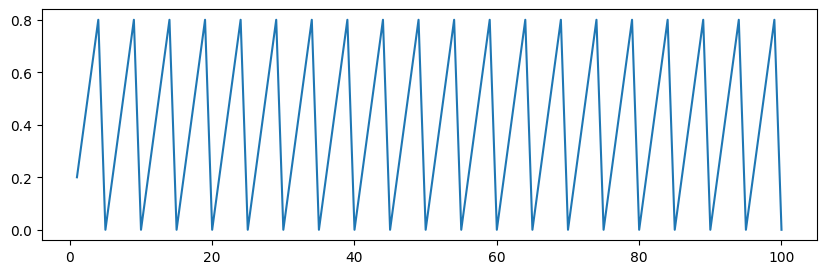

In [85]:
import numpy as np
import matplotlib.pyplot as plt

pitch = 5
step = 3
N = 100
n_train = int(N * 0.8)
n_test = N - n_train

def genData(x):
  return (x % pitch) / pitch

t = np.arange(1, N+1)

y = [genData(i) for i in t]

y = np.array(y)
# print(y)

plt.figure(figsize=(10, 3))
plt.plot(t, y)
plt.show()

In [86]:
def convertToMatrix(data, step=1):
  X, Y = [], []
  for i in range(len(data)-step):
    x, y = data[i:i+step], data[i+step]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

train, test = y[:n_train], y[n_train:]

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(77, 3) (77,)
(17, 3) (17,)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_26 (SimpleRNN)       │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

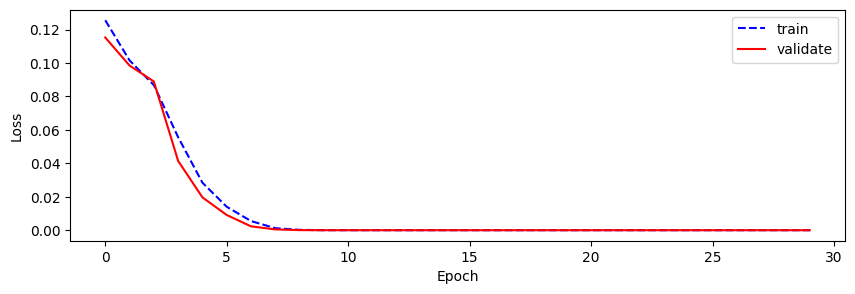

In [87]:
model = Sequential()
model.add(SimpleRNN(units=32,
                    input_shape=(step, 1),
                    activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=1,
    validation_data=(X_test, y_test),
    verbose=0)

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'], 'b--', label='train',)
plt.plot(history.history['val_loss'], 'r-' ,label='validate')
# add axis x y
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


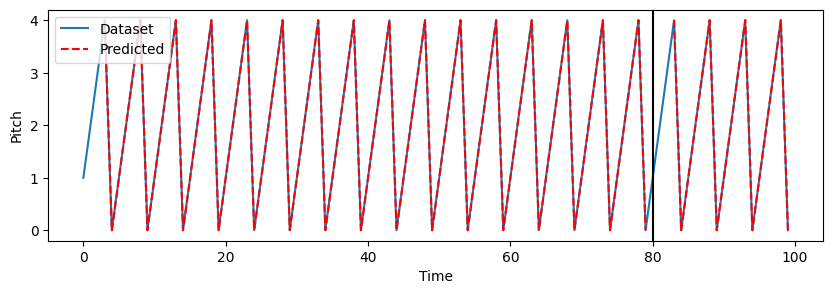

In [94]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# print(train_predict)
# print(test_predict)

prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)
train_predict = np.append(prefix, train_predict, axis=0)
test_predict = np.append(prefix, test_predict, axis=0)

predicted = np.concatenate((train_predict, test_predict), axis=0)
# print(predicted)

plt.figure(figsize=(10, 3))
plt.plot(y * pitch, label='Dataset')
plt.plot(predicted * pitch, 'r--', label='Predicted')
plt.axvline(x=n_train, color='k', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Pitch')
plt.legend()
plt.show()